In [1]:
# import subprocess
# import sys

# def install_requirements(requirements_path):
#     try:
#         print(f"Installing packages from {requirements_path}...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", requirements_path])
#         print("Packages installed successfully.")
#     except subprocess.CalledProcessError as e:
#         print(f"Error installing packages: {e}")

# install_requirements('requirements.txt')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("customer_churn.csv", delimiter = ",")

df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [5]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

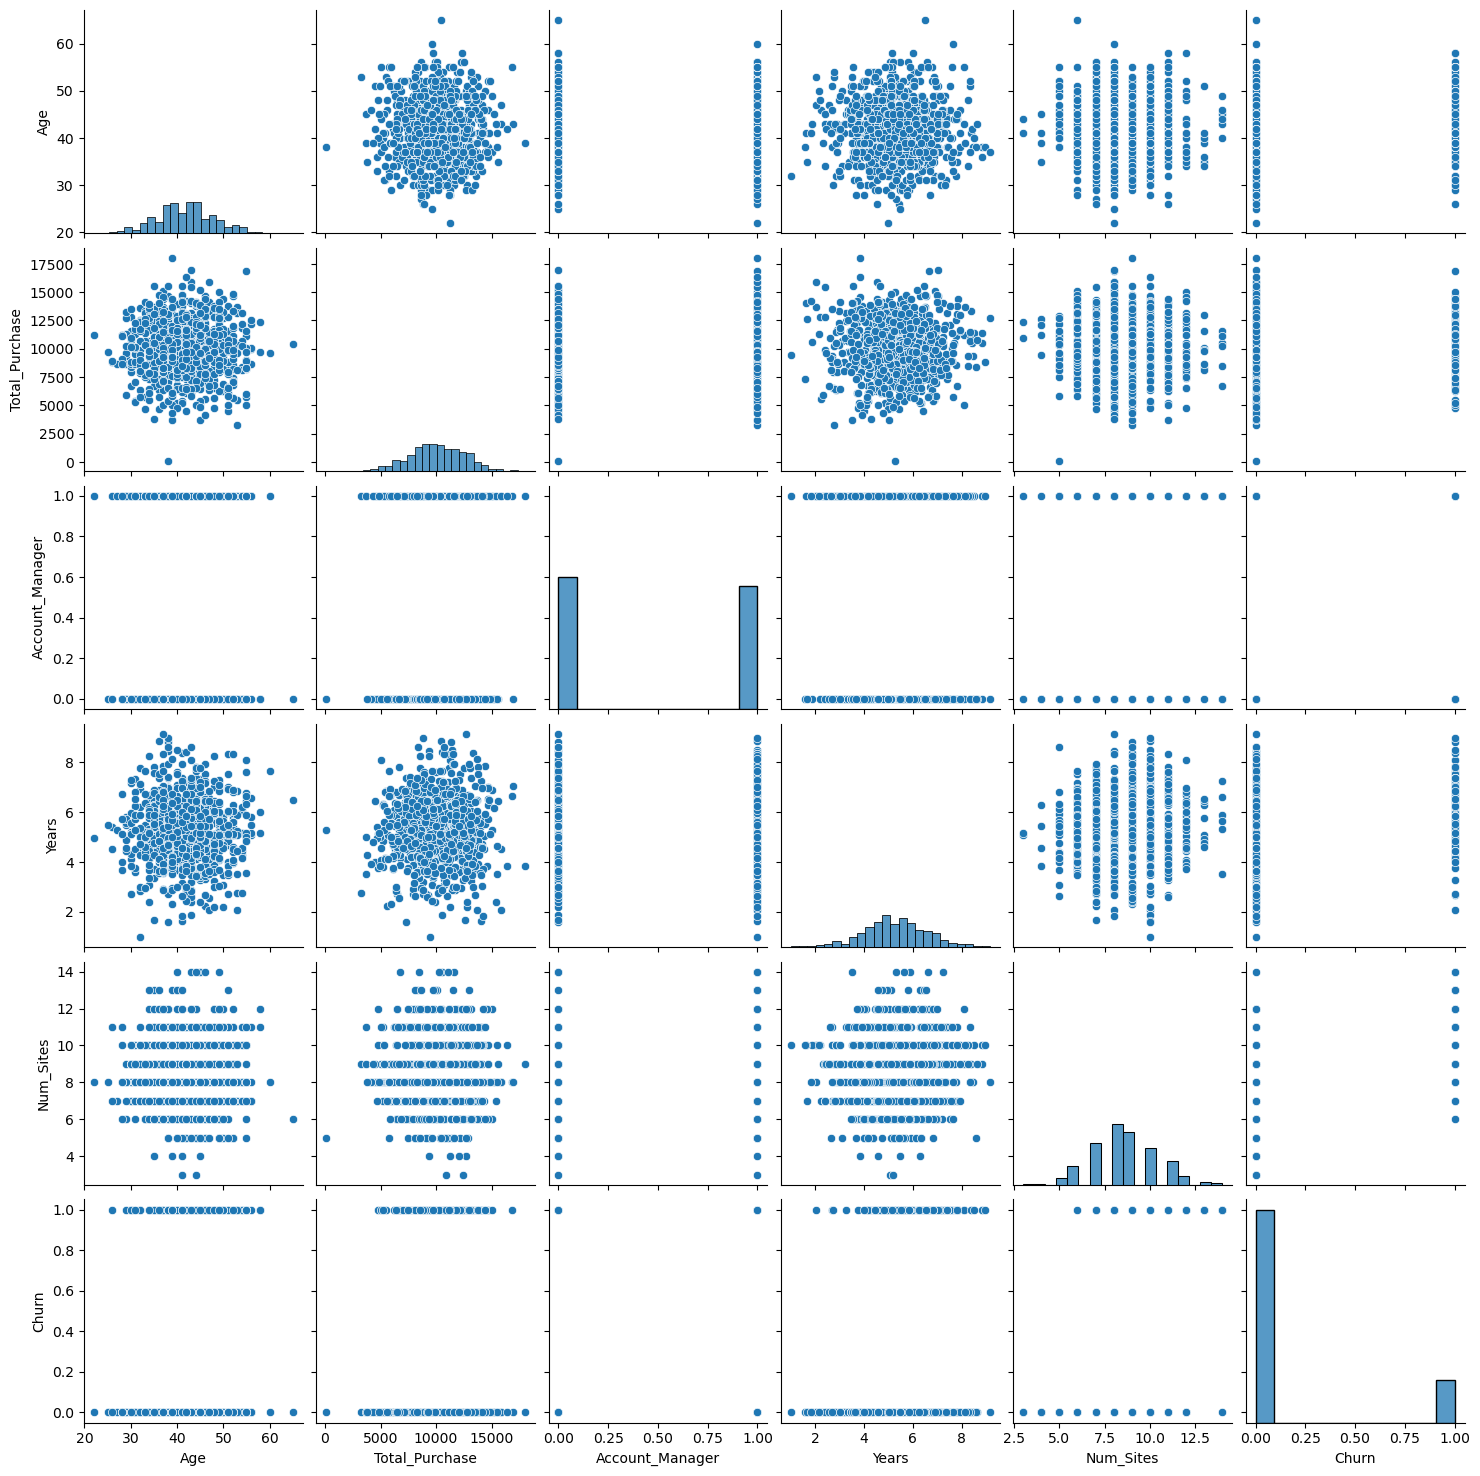

In [6]:
sns.pairplot(df)

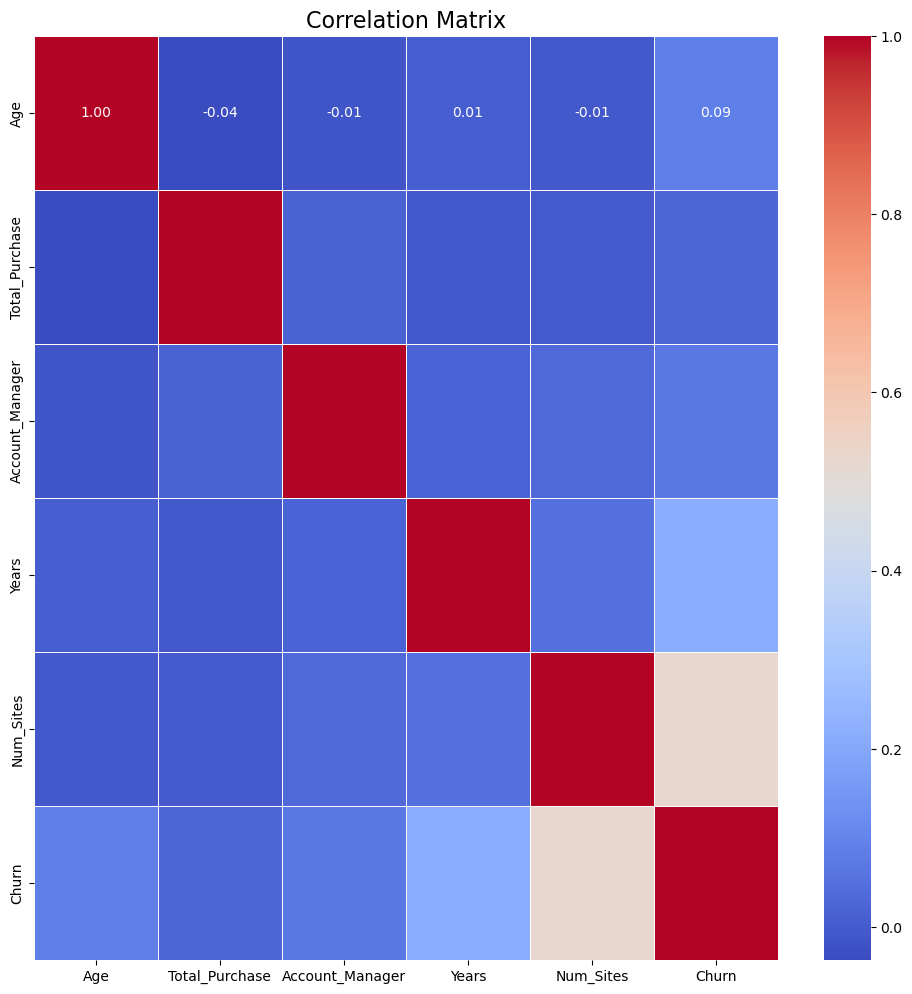

In [7]:
numeric_df = df.select_dtypes(include='number')
matrix = numeric_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<Axes: xlabel='Onboard_date', ylabel='Names'>

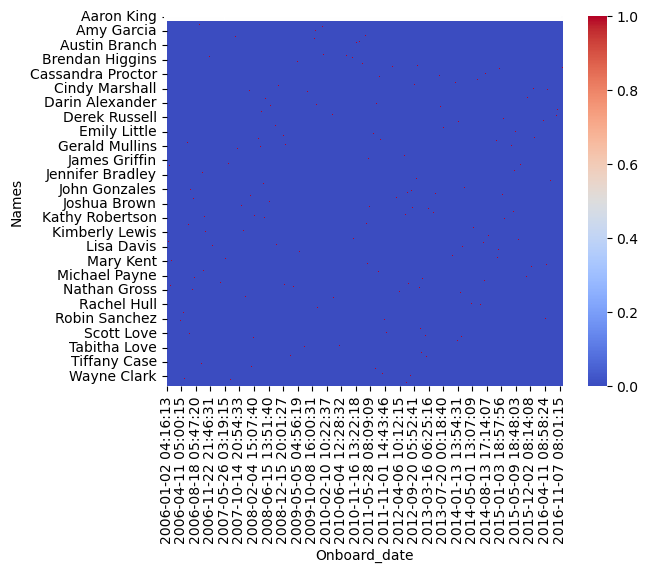

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns

contingency_table = pd.crosstab(index=df[categorical_columns[0]], columns=df[categorical_columns[1]])
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d")

In [9]:
X = df.drop(columns='Churn').select_dtypes(include=['number'])
y = df['Churn']

print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

Number of samples in X: 900
Number of samples in y: 900


In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # Train 60% and test 40%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split test evenly into test and validate, makes 20%/20%

In [11]:
def evaluate_model_performance(y_test=None, y_val=None, y_pred=None, model_name=""):
    if y_pred is None:
        raise ValueError("y_pred must be provided.")
    
    if y_test is not None:
        y_true = y_test
        data_type = "Test"
    elif y_val is not None:
        y_true = y_val
        data_type = "Validation"
    else:
        raise ValueError("Either y_test or y_val must be provided.")
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name}")
    print(f"{data_type} Accuracy: {accuracy}")
    print(f"{data_type} Precision: {precision}")
    print(f"{data_type} Recall: {recall}")
    print(f"{data_type} F1-Score: {f1}")
    print("\n")
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


In [12]:
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(X_train, y_train)
y_test_hgbc_pred = hgbc.predict(X_test)
y_val_hgbc_pred = hgbc.predict(X_val)

_ = evaluate_model_performance(y_test=y_test, y_pred=y_test_hgbc_pred, model_name="HistGradientBoostingClassifier")
_ = evaluate_model_performance(y_val=y_val, y_pred=y_val_hgbc_pred, model_name="HistGradientBoostingClassifier")


HistGradientBoostingClassifier
Test Accuracy: 0.8388888888888889
Test Precision: 0.6153846153846154
Test Recall: 0.45714285714285713
Test F1-Score: 0.5245901639344263


HistGradientBoostingClassifier
Validation Accuracy: 0.8777777777777778
Validation Precision: 0.5862068965517241
Validation Recall: 0.6296296296296297
Validation F1-Score: 0.6071428571428571




In [13]:
logo_r = LogisticRegression()
logo_r.fit(X_train, y_train)
y_pred_lr = logo_r.predict(X_test)

y_test_lr_pred = logo_r.predict(X_test)
y_val_lr_pred = logo_r.predict(X_val)

_ = evaluate_model_performance(y_test=y_test, y_pred=y_test_lr_pred, model_name="LogisticRegression")
_ = evaluate_model_performance(y_val=y_val, y_pred=y_val_lr_pred, model_name="LogisticRegression")

LogisticRegression
Test Accuracy: 0.8277777777777777
Test Precision: 0.6428571428571429
Test Recall: 0.2571428571428571
Test F1-Score: 0.36734693877551017


LogisticRegression
Validation Accuracy: 0.8333333333333334
Validation Precision: 0.3333333333333333
Validation Recall: 0.1111111111111111
Validation F1-Score: 0.16666666666666666




In [14]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

y_test_linear_r_pred = linear_r.predict(X_test)
y_val_linear_r_pred = linear_r.predict(X_val)

mae = mean_absolute_error(y_test, y_test_linear_r_pred)
mse = mean_squared_error(y_test, y_test_linear_r_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_linear_r_pred)

print("Linear Regeression")
print(f"Test Mean Absolute Error (MAE): {mae}")
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")
print(f"Test R-squared (R²): {r2}\n")

print("Linear Regeression")
print(f"Test Mean Absolute Error (MAE): {mae}")
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")
print(f"Test R-squared (R²): {r2}")

Linear Regeression
Test Mean Absolute Error (MAE): 0.2530013530074194
Test Mean Squared Error (MSE): 0.11260319777027306
Test Root Mean Squared Error (RMSE): 0.3355639995146575
Test R-squared (R²): 0.281114560047912

Linear Regeression
Test Mean Absolute Error (MAE): 0.2530013530074194
Test Mean Squared Error (MSE): 0.11260319777027306
Test Root Mean Squared Error (RMSE): 0.3355639995146575
Test R-squared (R²): 0.281114560047912


In [15]:
new_data = pd.DataFrame({
    'Age': [42],
    'Total_Purchase': [90000],
    'Account_Manager': [1],
    'Years': [10],
    'Num_Sites': [100],
})

prediction = logo_r.predict(new_data)
print(prediction)


[1]


In [17]:
joblib.dump(logo_r, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']